In [ ]:
!pip install seaborn pca

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading and Treating the data

In [4]:
df = pd.read_csv("SWaT.A3_dataset_Jul_19_labelled.csv", header=1, skiprows=[2])

C:\Users\kevin\AppData\Local\Temp\ipykernel_39300\2227756608.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("SWaT.A3_dataset_Jul_19_labelled.csv", header=1, skiprows=[2])


In [5]:
df["Attack"].replace(np.nan, "benign", inplace=True)
df["Label"].replace(np.nan, 0, inplace=True)
df = df.rename(columns={"GMT +0": "Time"})
df["Time"] = df["Time"].apply(lambda x: pd.to_datetime(x).timestamp()).astype(int)

In [6]:
df.head(5)

,Time,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,1563597000,benign,0.0,0.0,729.8658,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
1,1563597001,benign,0.0,0.0,729.4340,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
2,1563597002,benign,0.0,0.0,729.1200,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
3,1563597003,benign,0.0,0.0,728.6882,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
4,1563597004,benign,0.0,0.0,727.7069,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1


Replacing columns with dictionaries in strings with one column for each key in said dictionary

In [7]:
for name in df.columns:
    if len(name) >= 2 and name[0:2] == "LS":
        object_list = df[name].tolist()
        object_list = [eval(obj.replace("'", "\"")) for obj in object_list]
        for key_name in object_list[0].keys():
            values = [obj[key_name] for obj in object_list]
            df[name + "_" + key_name] = values
        df = df.drop(name, axis=1)

In [8]:
df.head(5)

,Time,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,...,LSH 603_Value,LSL 601_IsSystem,LSL 601_Name,LSL 601_Value,LSL 602_IsSystem,LSL 602_Name,LSL 602_Value,LSL 603_IsSystem,LSL 603_Name,LSL 603_Value
0,1563597000,benign,0.0,0.0,729.8658,1,3,2,1,142.527557,...,0,False,Inactive,0,False,Inactive,0,False,Active,1
1,1563597001,benign,0.0,0.0,729.4340,1,3,2,1,142.527557,...,0,False,Inactive,0,False,Inactive,0,False,Active,1
2,1563597002,benign,0.0,0.0,729.1200,1,3,2,1,142.527557,...,0,False,Inactive,0,False,Inactive,0,False,Active,1
3,1563597003,benign,0.0,0.0,728.6882,1,3,2,1,142.527557,...,0,False,Inactive,0,False,Inactive,0,False,Active,1
4,1563597004,benign,0.0,0.0,727.7069,1,3,2,1,142.527557,...,0,False,Inactive,0,False,Inactive,0,False,Active,1


Removing columns with constant value

In [9]:
df = df.loc[:, (df != df.iloc[0]).any()] 

In [10]:
df.head(5)

,Time,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,AIT 201,AIT 202,...,FIT 503,FIT 504,MV 501,PIT 501,PIT 502,PIT 503,FIT 601,P601 Status,LSH 601_Name,LSH 601_Value
0,1563597000,benign,0.0,0.0,729.8658,1,3,2,142.527557,9.293002,...,0.623628,0.213432,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
1,1563597001,benign,0.0,0.0,729.4340,1,3,2,142.527557,9.293002,...,0.623628,0.212984,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
2,1563597002,benign,0.0,0.0,729.1200,1,3,2,142.527557,9.293002,...,0.623628,0.212984,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
3,1563597003,benign,0.0,0.0,728.6882,1,3,2,142.527557,9.289157,...,0.623628,0.212792,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
4,1563597004,benign,0.0,0.0,727.7069,1,3,2,142.527557,9.289157,...,0.623628,0.214009,2,167.601257,2.963509,119.921173,0.00032,1,Active,1


In [11]:
df["Label"].unique()

array([0., 1.])

We can see that the values of the Label column should be integers

In [12]:
df["Label"] = df["Label"].astype(int)

In [13]:
df.head(5)

,Time,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,AIT 201,AIT 202,...,FIT 503,FIT 504,MV 501,PIT 501,PIT 502,PIT 503,FIT 601,P601 Status,LSH 601_Name,LSH 601_Value
0,1563597000,benign,0,0.0,729.8658,1,3,2,142.527557,9.293002,...,0.623628,0.213432,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
1,1563597001,benign,0,0.0,729.4340,1,3,2,142.527557,9.293002,...,0.623628,0.212984,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
2,1563597002,benign,0,0.0,729.1200,1,3,2,142.527557,9.293002,...,0.623628,0.212984,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
3,1563597003,benign,0,0.0,728.6882,1,3,2,142.527557,9.289157,...,0.623628,0.212792,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
4,1563597004,benign,0,0.0,727.7069,1,3,2,142.527557,9.289157,...,0.623628,0.214009,2,167.601257,2.963509,119.921173,0.00032,1,Active,1


One hot encoding non-numerical columns

In [14]:
df = pd.get_dummies(data=df, columns=list(df.select_dtypes(['object']).columns))

In [15]:
df.head(5)

,Time,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,AIT 201,AIT 202,AIT 203,...,FIT 601,P601 Status,LSH 601_Value,Attack_Spoofing,Attack_Switch_ON,Attack_Switch_close,Attack_Switch_off,Attack_benign,LSH 601_Name_Active,LSH 601_Name_Inactive
0,1563597000,0,0.0,729.8658,1,3,2,142.527557,9.293002,198.077423,...,0.00032,1,1,False,False,False,False,True,True,False
1,1563597001,0,0.0,729.4340,1,3,2,142.527557,9.293002,198.385025,...,0.00032,1,1,False,False,False,False,True,True,False
2,1563597002,0,0.0,729.1200,1,3,2,142.527557,9.293002,198.436300,...,0.00032,1,1,False,False,False,False,True,True,False
3,1563597003,0,0.0,728.6882,1,3,2,142.527557,9.289157,198.667000,...,0.00032,1,1,False,False,False,False,True,True,False
4,1563597004,0,0.0,727.7069,1,3,2,142.527557,9.289157,198.897720,...,0.00032,1,1,False,False,False,False,True,True,False


# Visualisation

## Correlation

Check the correlation values on the dataset.

[Text(0.5, 0, 'Time'),
 Text(2.5, 0, 'FIT 101'),
 Text(4.5, 0, 'MV 101'),
 Text(6.5, 0, 'P101 Status'),
 Text(8.5, 0, 'AIT 202'),
 Text(10.5, 0, 'FIT 201'),
 Text(12.5, 0, 'P203 Status'),
 Text(14.5, 0, 'AIT 301'),
 Text(16.5, 0, 'AIT 303'),
 Text(18.5, 0, 'FIT 301'),
 Text(20.5, 0, 'MV 301'),
 Text(22.5, 0, 'MV 303'),
 Text(24.5, 0, 'P3_STATE'),
 Text(26.5, 0, 'AIT 402'),
 Text(28.5, 0, 'LIT 401'),
 Text(30.5, 0, 'UV401'),
 Text(32.5, 0, 'AIT 502'),
 Text(34.5, 0, 'AIT 504'),
 Text(36.5, 0, 'FIT 502'),
 Text(38.5, 0, 'FIT 504'),
 Text(40.5, 0, 'PIT 501'),
 Text(42.5, 0, 'PIT 503'),
 Text(44.5, 0, 'P601 Status')]

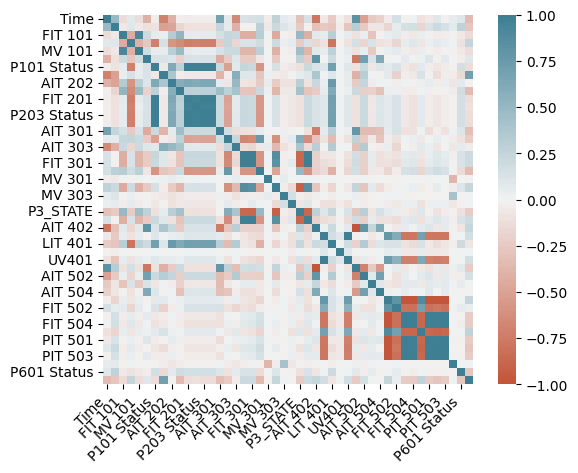

In [16]:
import seaborn as sns

df_numerical = df.select_dtypes(include=['number'])

corr = df_numerical.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

## PCA

Attempt a PCA to find relevant information.

In [17]:
from pca import pca

model = pca(normalize=True, detect_outliers=['ht2','spe'])
out = model.fit_transform(df_numerical)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [46] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [18] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [46] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[18]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 18 Principal Components explain [96.62%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

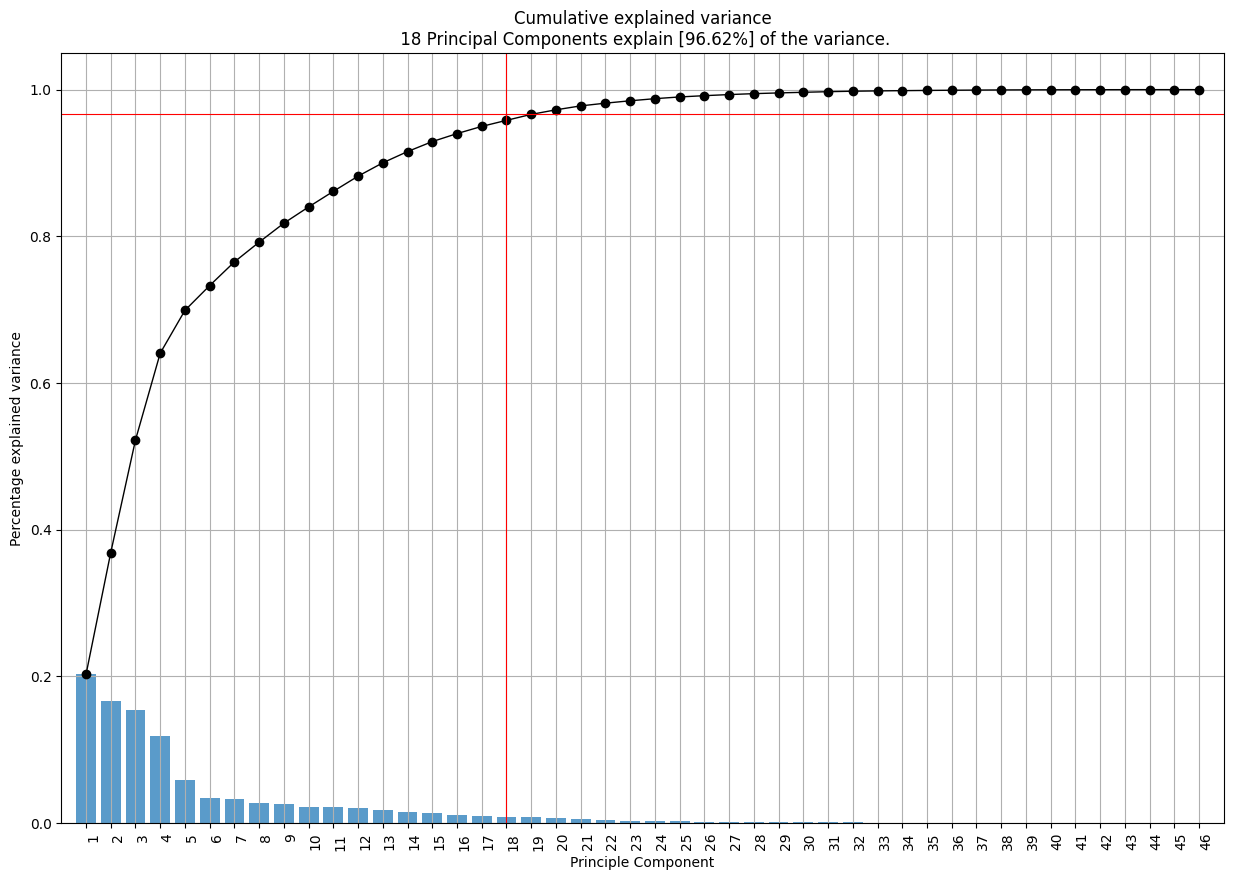

In [18]:
model.plot()

In [19]:
topfeat = out['topfeat'][out['topfeat']["type"] == "best"].drop("type", axis=1)
topfeat.style.background_gradient(cmap='viridis', low=0.2, high=0.2)

,PC,feature,loading
0,PC1,PIT 502,0.289429
1,PC2,P203 Status,0.290618
2,PC3,P3_STATE,0.331296
3,PC4,AIT 301,-0.352482
4,PC5,AIT 201,-0.414005
5,PC6,FIT 601,0.643842
6,PC7,MV 101,-0.485758
7,PC8,P601 Status,0.630835
8,PC9,MV 304,0.692761
9,PC10,P401 Status,-0.761663


<Axes: >

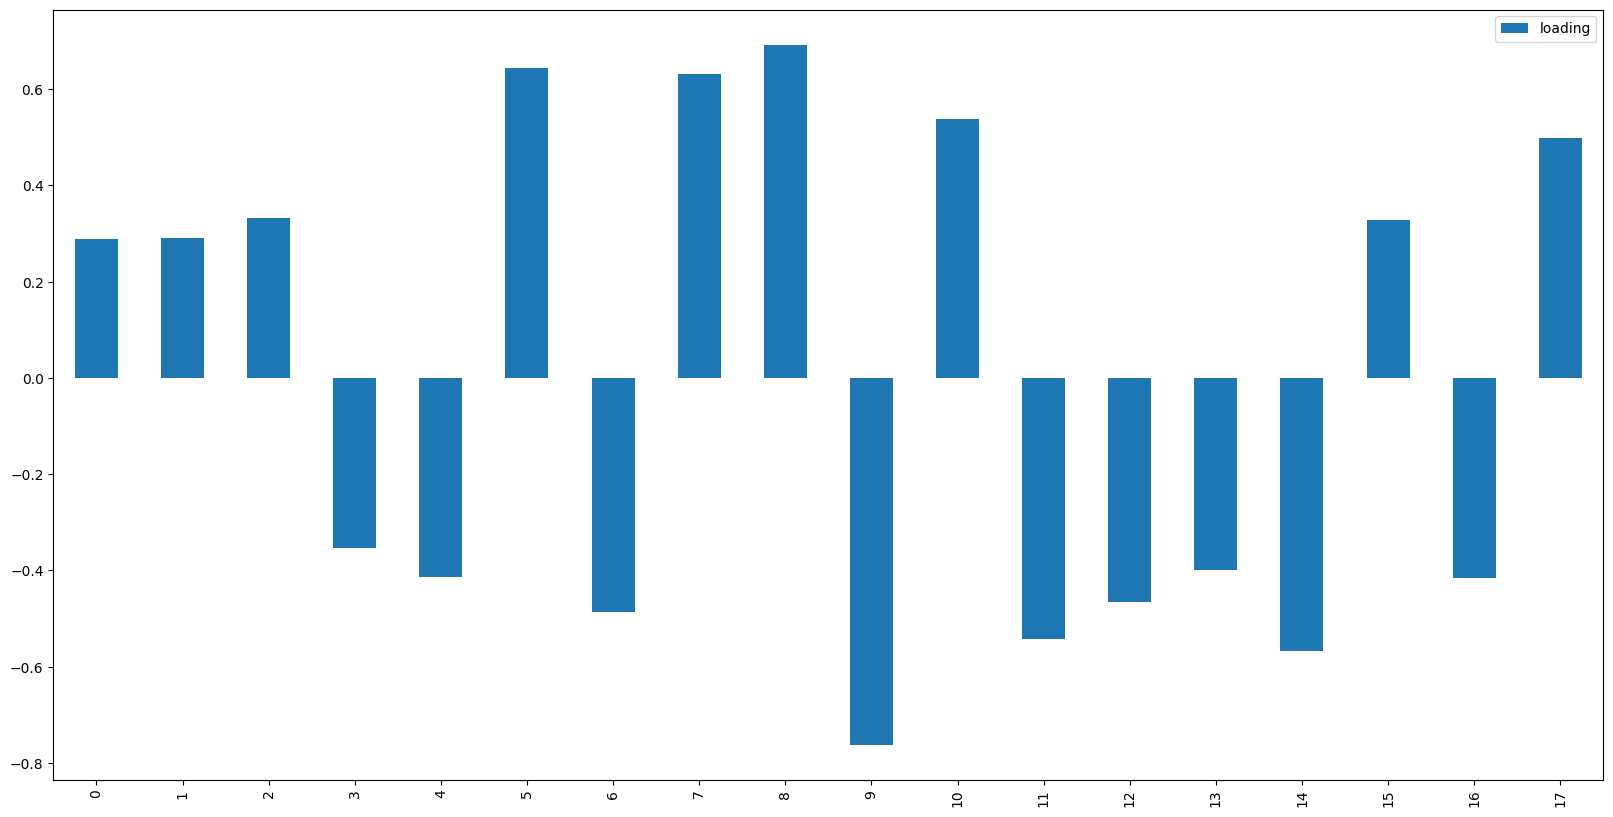

In [20]:
topfeat.drop("PC", axis=1).plot.bar(figsize=(20,10))

In [21]:
print(topfeat.sort_values(by="loading", ascending=False, key=np.abs).style.to_latex())

\begin{tabular}{lllr}
 & PC & feature & loading \\
9 & PC10 & P401 Status & -0.761663 \\
8 & PC9 & MV 304 & 0.692761 \\
5 & PC6 & FIT 601 & 0.643842 \\
7 & PC8 & P601 Status & 0.630835 \\
14 & PC15 & AIT 503 & -0.566851 \\
11 & PC12 & MV 304 & -0.542471 \\
10 & PC11 & AIT 503 & 0.537719 \\
17 & PC18 & LIT 301 & 0.499091 \\
6 & PC7 & MV 101 & -0.485758 \\
12 & PC13 & Label & -0.466157 \\
16 & PC17 & AIT 303 & -0.414773 \\
4 & PC5 & AIT 201 & -0.414005 \\
13 & PC14 & LSH 601_Value & -0.398673 \\
3 & PC4 & AIT 301 & -0.352482 \\
2 & PC3 & P3_STATE & 0.331296 \\
15 & PC16 & LIT 401 & 0.327213 \\
1 & PC2 & P203 Status & 0.290618 \\
0 & PC1 & PIT 502 & 0.289429 \\
\end{tabular}



[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '18 Principal Components explain [96.62%] of the variance'}, xlabel='PC1 (20.2% expl.var)', ylabel='PC2 (16.6% expl.var)'>)

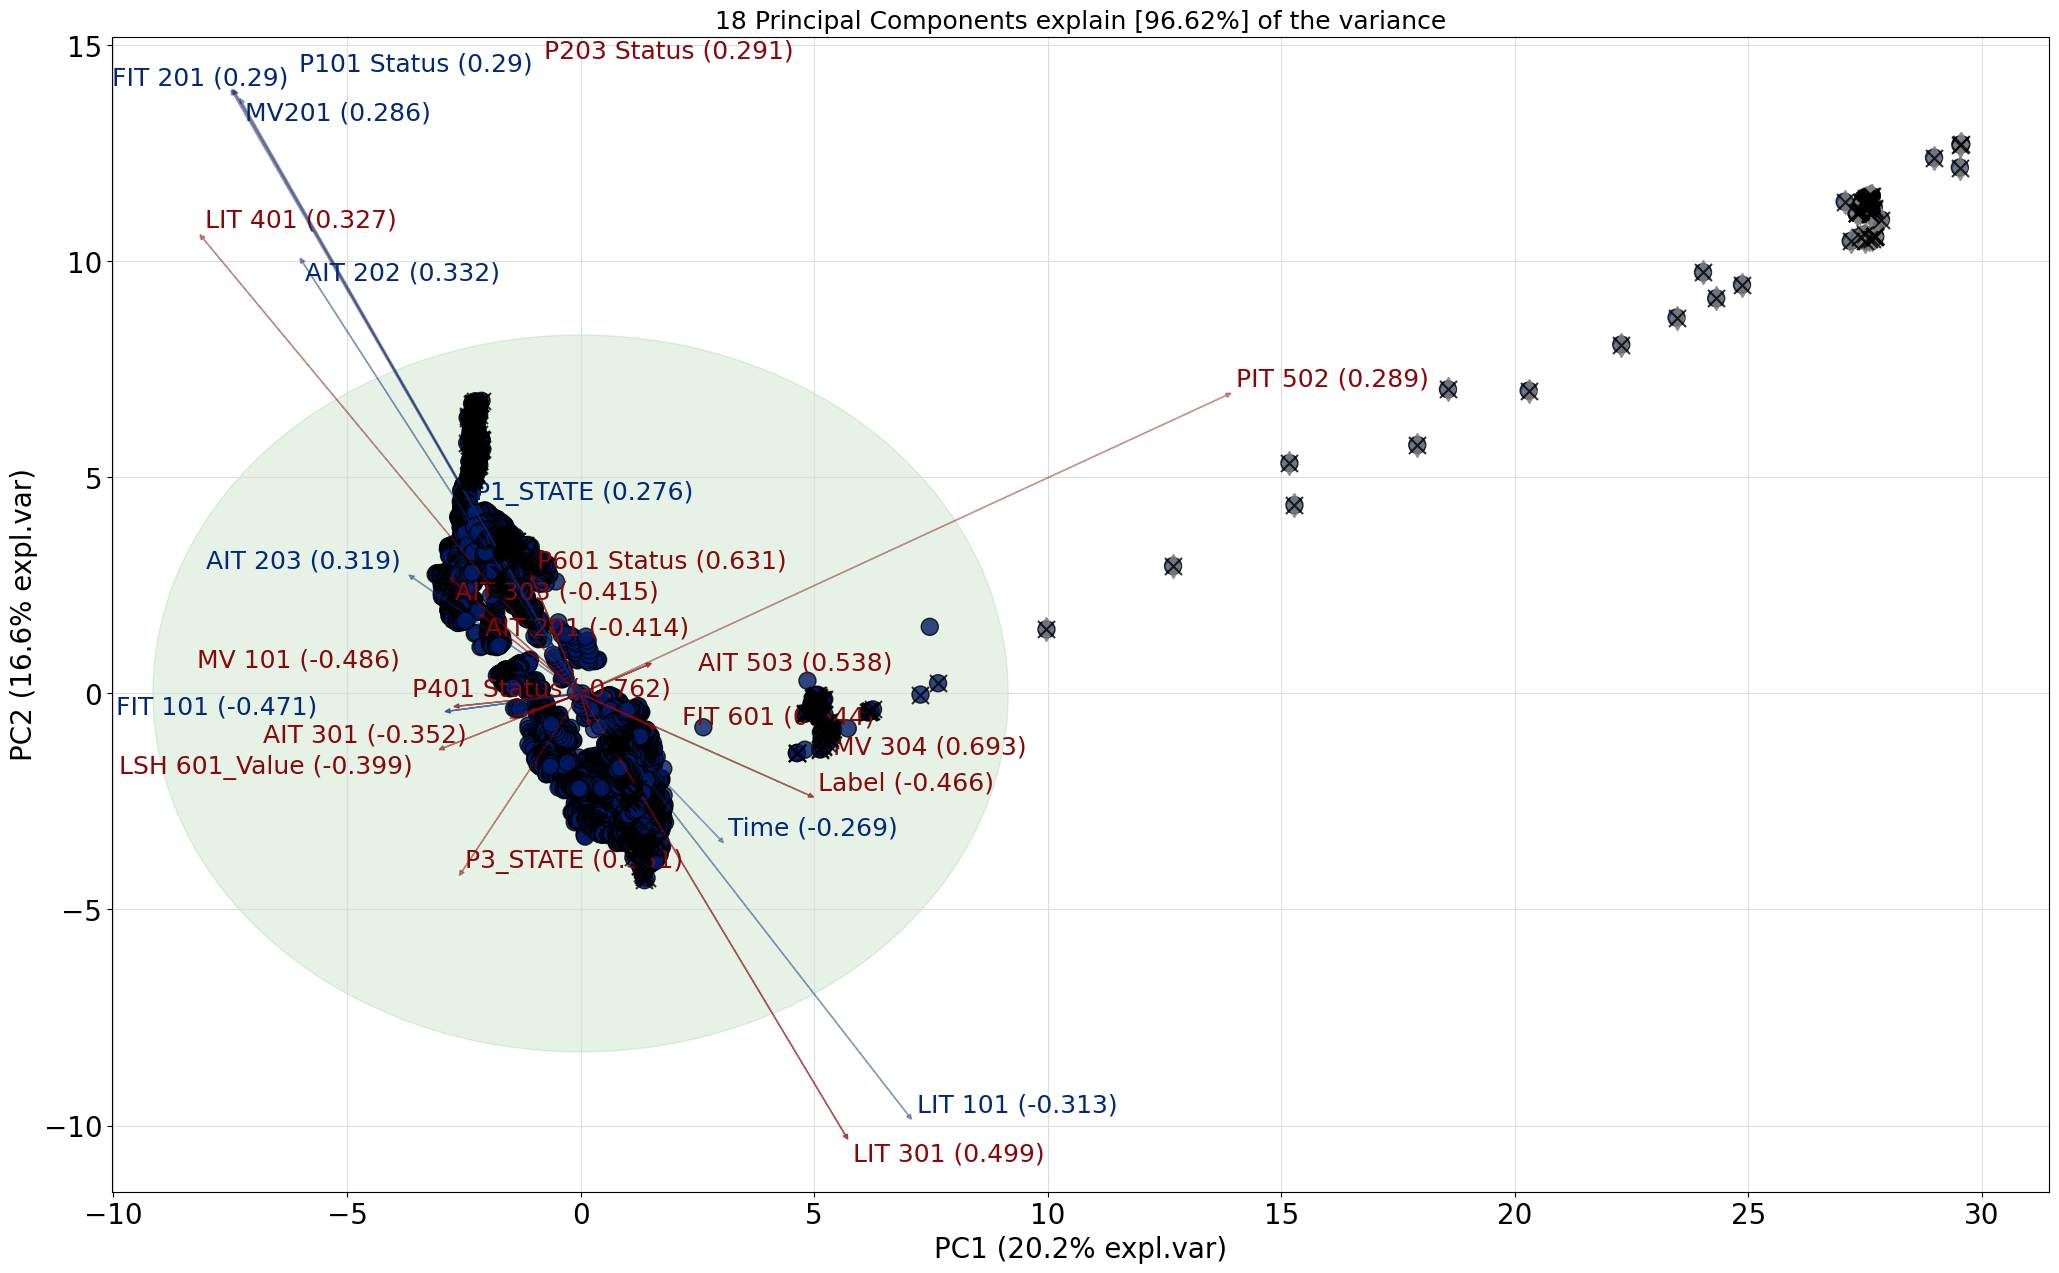

In [22]:
model.biplot(SPE=True, HT2=True, label=df["Label"])

## Data balance

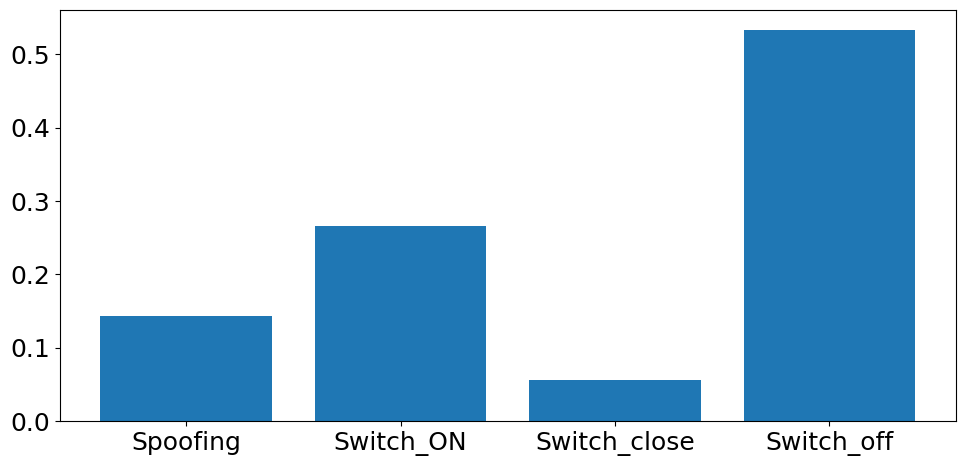

In [23]:
labels = [ "Attack_Spoofing", "Attack_Switch_ON", "Attack_Switch_close", "Attack_Switch_off"]
attacks = df["Label"].sum()
percentages = {}
for label in labels:
    percentages[label[7:]] = df[label].sum() / attacks

plt.figure(figsize=(10, 5))
plt.bar(percentages.keys(), percentages.values())
plt.tight_layout()

Ici, on veut s'assurer que les attaques soient un minimum équilibrés pour éviter que les modèles ne s'entrainent qu'à un seul type d'attaque.

On remarque que les attaques "Switch_close" sont peu représentés dans le dataset tandis que les attaques "Switch_off" dominent.

Il va falloir y prêter attention lors de l'analyse des résultats.

# Outlier detection

In [24]:
from sklearn.ensemble import IsolationForest

df_no_label = df.drop(["Label", "Attack_Spoofing", "Attack_Switch_ON", "Attack_Switch_close", "Attack_Switch_off", "Attack_benign"], axis=1)

contamination = len(df[(df["Label"] != 0)]) / len(df)


predictor = IsolationForest(contamination = contamination, random_state = 42)
predictor.fit(df_no_label)
outliers = predictor.predict(df_no_label)

print(f"Number of outliers found: {sum(outliers == -1)}")
df_no_label["outliers"] = outliers
correct_outliers = len(df[df["Label"] == 1][df_no_label["outliers"] == -1])
print(f"Correctly identified outliers: {correct_outliers}")

C:\Users\kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of outliers found: 2553
Correctly identified outliers: 883


C:\Users\kevin\AppData\Local\Temp\ipykernel_39300\1312268490.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  correct_outliers = len(df[df["Label"] == 1][df_no_label["outliers"] == -1])


In [25]:
from sklearn.neighbors import LocalOutlierFactor


predictor = LocalOutlierFactor(contamination = contamination)
outliers = predictor.fit_predict(df_no_label)

print(f"Number of outliers found: {sum(outliers == -1)}")
df_no_label["lof_outliers"] = outliers
correct_outliers = len(df[df["Label"] == 1][df_no_label["lof_outliers"] == -1])
print(f"Correctly identified outliers: {correct_outliers}")

Number of outliers found: 2553
Correctly identified outliers: 521


C:\Users\kevin\AppData\Local\Temp\ipykernel_39300\536008177.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  correct_outliers = len(df[df["Label"] == 1][df_no_label["lof_outliers"] == -1])


In [26]:
def show3D_data_fraud(df, df_no_label, x_axis_name, y_axis_name, z_axis_name):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})
    
    df_fraud = df[df["Label"] == 1]
    df_no_fraud = df[df["Label"] == 0]
    
    df_no_label_iso_f = df_no_label[df_no_label["outliers"] == -1]
    df_no_label_iso_no_f = df_no_label[df_no_label["outliers"] == 1]
    
    df_no_label_lof_f = df_no_label[df_no_label["lof_outliers"] == -1]
    df_no_label_lof_no_f = df_no_label[df_no_label["lof_outliers"] == 1]
    
    axes[0, 1].scatter(df_fraud[x_axis_name], df_fraud[y_axis_name], df_fraud[z_axis_name], c="red", label="Fraud")
    axes[0, 1].scatter(df_no_fraud[x_axis_name], df_no_fraud[y_axis_name], df_no_fraud[z_axis_name], c="green", label="Not Fraud")
    axes[0, 1].set_title("Real outliers")
    
    axes[0, 0].scatter(df[x_axis_name], df[y_axis_name], df[z_axis_name], c="blue", label="All")
    axes[0, 0].set_title("All")
    
    axes[1, 0].scatter(df_no_label_iso_f[x_axis_name], df_no_label_iso_f[y_axis_name], df_no_label_iso_f[z_axis_name], c="red", label="Fraud")
    axes[1, 0].scatter(df_no_label_iso_no_f[x_axis_name], df_no_label_iso_no_f[y_axis_name], df_no_label_iso_no_f[z_axis_name], c="green", label="Not Fraud")
    axes[1, 0].set_title("Isolation Forest")
    
    axes[1, 1].scatter(df_no_label_lof_f[x_axis_name], df_no_label_lof_f[y_axis_name], df_no_label_lof_f[z_axis_name], c="red", label="Fraud")
    axes[1, 1].scatter(df_no_label_lof_no_f[x_axis_name], df_no_label_lof_no_f[y_axis_name], df_no_label_lof_no_f[z_axis_name], c="green", label="Not Fraud")
    axes[1, 1].set_title("LOF")
    
    
    for i in range(2):
        for j in range(2):
            ax = axes[i, j]
            ax.set_xlabel(x_axis_name)
            ax.set_ylabel(y_axis_name)
            ax.set_zlabel(z_axis_name)
            ax.legend(loc='best')
    
    
    plt.show()

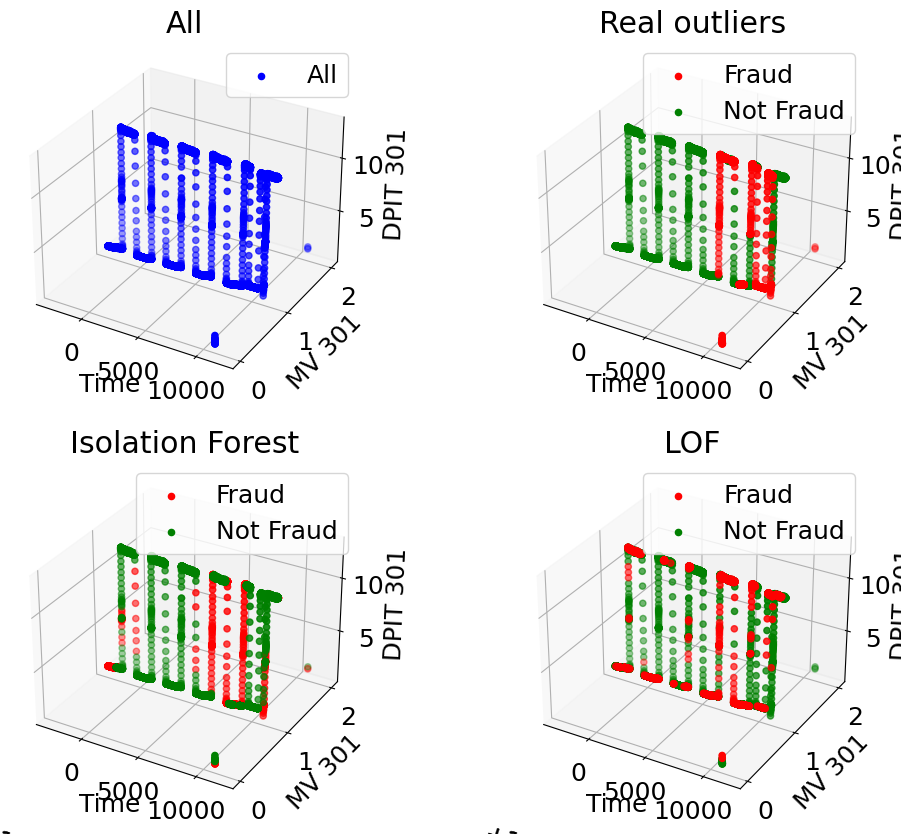

In [27]:
show3D_data_fraud(df, df_no_label, 'Time', 'MV 301','DPIT 301')

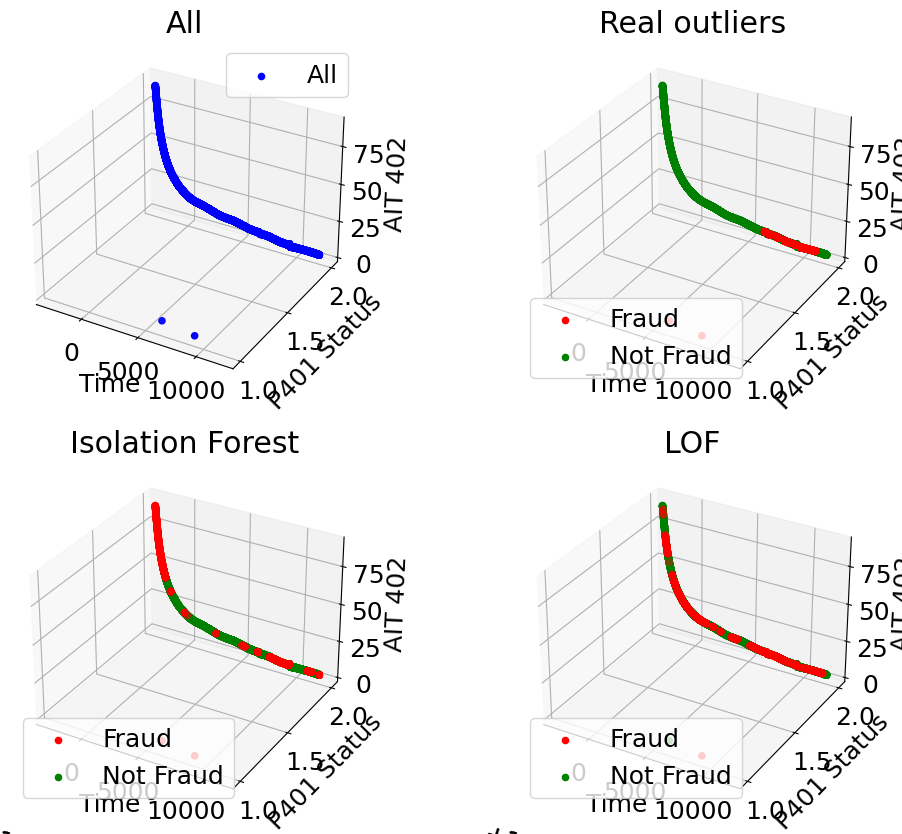

In [28]:
show3D_data_fraud(df, df_no_label, 'Time', 'P401 Status','AIT 402')

## LSTM 

In [21]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [22]:
df_numerical = df.select_dtypes(include=['number'])

# Divisez le DataFrame en ensembles d'entraînement et de test
train_df, test_df = train_test_split(df_numerical, test_size=0.2, random_state=42)

# Les ensembles d'entraînement et de test contiennent toutes les colonnes, y compris les caractéristiques et le label
X_train = train_df.drop("Label", axis=1)
y_train = train_df["Label"]

X_test = test_df.drop("Label", axis=1)
y_test = test_df["Label"]

In [23]:
# Construction du modèle LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=False),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [46]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Évaluation du modèle
loss = model.evaluate(X_test, y_test)
print(f'Loss on test data: {loss}')

# Faire des prédictions
predictions = model.predict(X_test)

Epoch 1/50
375/375 [==============================] - 9s 18ms/step - loss: 0.1385 - accuracy: 0.8248 - val_loss: 0.1309 - val_accuracy: 0.8440
Epoch 2/50
375/375 [==============================] - 6s 17ms/step - loss: 0.0822 - accuracy: 0.8860 - val_loss: 0.0746 - val_accuracy: 0.8870
Epoch 3/50
375/375 [==============================] - 7s 18ms/step - loss: 0.0717 - accuracy: 0.8935 - val_loss: 0.0685 - val_accuracy: 0.8980
Epoch 4/50
375/375 [==============================] - 6s 17ms/step - loss: 0.0671 - accuracy: 0.9027 - val_loss: 0.0680 - val_accuracy: 0.9030
Epoch 5/50
375/375 [==============================] - 7s 18ms/step - loss: 0.0605 - accuracy: 0.9049 - val_loss: 0.0545 - val_accuracy: 0.9000
Epoch 6/50
375/375 [==============================] - 6s 17ms/step - loss: 0.0521 - accuracy: 0.9216 - val_loss: 0.0500 - val_accuracy: 0.9170
Epoch 7/50
375/375 [==============================] - 6s 17ms/step - loss: 0.0453 - accuracy: 0.9272 - val_loss: 0.0425 - val_accuracy: 0.9133

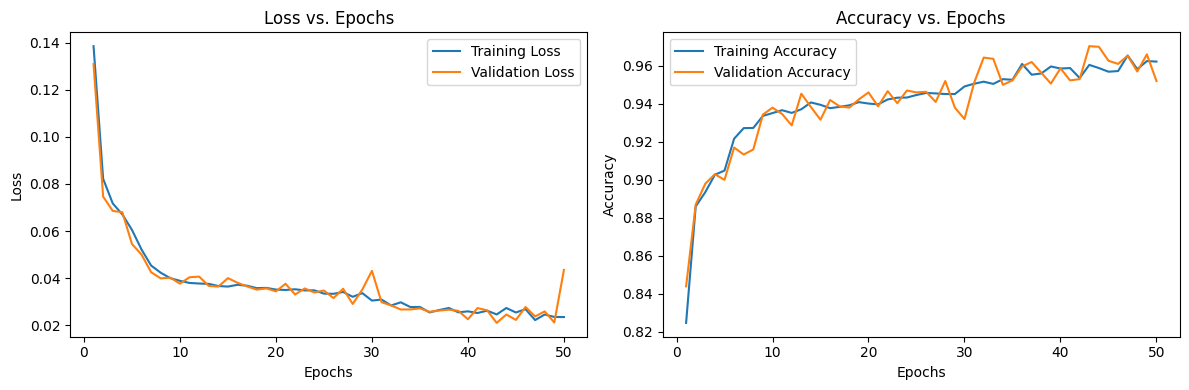

In [47]:
# Extraire les données d'entraînement
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Tracer la courbe de la perte
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Tracer la courbe d'accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
import numpy as np
import seaborn as sns

numerical_copy = df_numerical.copy()

numerical_copy = numerical_copy.drop("Time", axis=1)
numerical_copy.head(5)

,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,AIT 201,AIT 202,AIT 203,FIT 201,...,FIT 502,FIT 503,FIT 504,MV 501,PIT 501,PIT 502,PIT 503,FIT 601,P601 Status,LSH 601_Value
0,0,0.0,729.8658,1,3,2,142.527557,9.293002,198.077423,2.335437,...,0.310362,0.623628,0.213432,2,167.601257,2.963509,119.921173,0.00032,1,1
1,0,0.0,729.4340,1,3,2,142.527557,9.293002,198.385025,2.335437,...,0.315102,0.623628,0.212984,2,167.601257,2.963509,119.921173,0.00032,1,1
2,0,0.0,729.1200,1,3,2,142.527557,9.293002,198.436300,2.335437,...,0.317023,0.623628,0.212984,2,167.601257,2.963509,119.921173,0.00032,1,1
3,0,0.0,728.6882,1,3,2,142.527557,9.289157,198.667000,2.335437,...,0.308057,0.623628,0.212792,2,167.601257,2.963509,119.921173,0.00032,1,1
4,0,0.0,727.7069,1,3,2,142.527557,9.289157,198.897720,2.335437,...,0.303446,0.623628,0.214009,2,167.601257,2.963509,119.921173,0.00032,1,1


C:\Users\henri\AppData\Local\Temp\ipykernel_20236\86874084.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


[Text(0, 0, 'Label'),
 Text(1, 0, 'FIT 101'),
 Text(2, 0, 'LIT 101'),
 Text(3, 0, 'MV 101'),
 Text(4, 0, 'P1_STATE'),
 Text(5, 0, 'P101 Status'),
 Text(6, 0, 'AIT 201'),
 Text(7, 0, 'AIT 202'),
 Text(8, 0, 'AIT 203'),
 Text(9, 0, 'FIT 201'),
 Text(10, 0, 'MV201'),
 Text(11, 0, 'P203 Status'),
 Text(12, 0, 'P205 Status'),
 Text(13, 0, 'AIT 301'),
 Text(14, 0, 'AIT 302'),
 Text(15, 0, 'AIT 303'),
 Text(16, 0, 'DPIT 301'),
 Text(17, 0, 'FIT 301'),
 Text(18, 0, 'LIT 301'),
 Text(19, 0, 'MV 301'),
 Text(20, 0, 'MV 302'),
 Text(21, 0, 'MV 303'),
 Text(22, 0, 'MV 304'),
 Text(23, 0, 'P3_STATE'),
 Text(24, 0, 'P301 Status'),
 Text(25, 0, 'AIT 402'),
 Text(26, 0, 'FIT 401'),
 Text(27, 0, 'LIT 401'),
 Text(28, 0, 'P401 Status'),
 Text(29, 0, 'UV401'),
 Text(30, 0, 'AIT 501'),
 Text(31, 0, 'AIT 502'),
 Text(32, 0, 'AIT 503'),
 Text(33, 0, 'AIT 504'),
 Text(34, 0, 'FIT 501'),
 Text(35, 0, 'FIT 502'),
 Text(36, 0, 'FIT 503'),
 Text(37, 0, 'FIT 504'),
 Text(38, 0, 'MV 501'),
 Text(39, 0, 'PIT 501'),

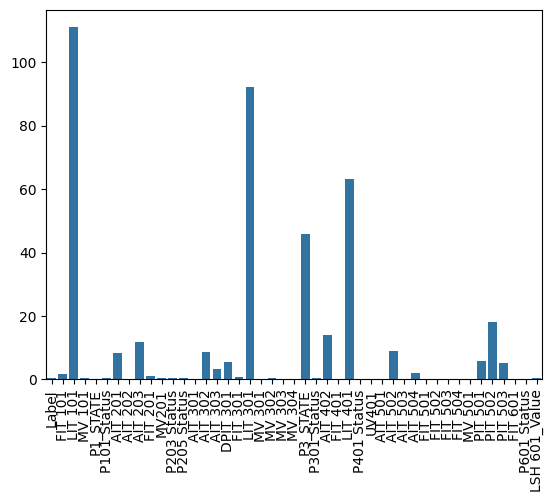

In [34]:
# Calculez la RMS-deviation pour chaque capteur
rms_deviations = np.zeros(len(numerical_copy.columns))
for i in range(len(numerical_copy.columns)):
    rms_deviations[i] = np.sqrt(np.mean(np.square(numerical_copy.iloc[:, i] - numerical_copy.iloc[:, i].mean())))

# Visualisez les RMS-deviations
ax = sns.barplot(rms_deviations)

ax.set_xticklabels(
    numerical_copy.columns,
    rotation=90
)

# Multiclass classification

In [35]:
df_numerical["Attack_Spoofing"] = df["Attack_Spoofing"]
df_numerical["Attack_Switch_ON"] = df["Attack_Switch_ON"].map({0: 0, 1: 2})
df_numerical["Attack_Switch_close"] = df["Attack_Switch_close"].map({0: 0, 1: 3})
df_numerical["Attack_Switch_off"] = df["Attack_Switch_off"].map({0: 0, 1: 4})

In [37]:
def get_label(row):
  return max(row["Attack_Spoofing"],row["Attack_Switch_ON"], row["Attack_Switch_close"], row["Attack_Switch_off"])

df_numerical["Label"] = df_numerical.apply(get_label, axis=1)

In [43]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

df_no_label = df_numerical.drop(["Attack_Spoofing", "Attack_Switch_ON", "Attack_Switch_close", "Attack_Switch_off"], axis=1)

train_df, test_df = train_test_split(df_no_label, test_size=0.2, random_state=42)

X_train = train_df.drop("Label", axis=1)
y_train = train_df["Label"]

X_test = test_df.drop("Label", axis=1)
y_test = test_df["Label"]


feature_names = [f"feature {i}" for i in range(X_train.shape[1])]

def get_metrics(clf):
  y_pred = clf.predict(X_test)
  acc = clf.score(X_test, y_test)
  (precision, recall, f_score, support) = precision_recall_fscore_support(y_test, y_pred, average="macro")
  print(f"Metrics : Accuracy = {acc}, precision = {precision}, recall = {recall}, f_score = {f_score}")

def get_feature_importance(clf):
  result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42
    )
  forest_importances = pd.Series(result.importances_mean, index=feature_names)
  fig, ax = plt.subplots(figsize=(8, 6))
  forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
  ax.set_title(f"Feature importances on the {clf.__class__.__name__}")
  ax.set_ylabel("Mean accuracy decrease")
  important_feature = X_train.columns[result.importances_mean.argmax()]
  fig.suptitle(f'The classifier is focused on {important_feature}', fontsize=14, fontweight='bold')
  fig.tight_layout()
  plt.show()

In [44]:
mlp_clf = MLPClassifier(random_state=42, early_stopping=True).fit(X_train, y_train)
rf_clf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
dtc_clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
gb_clf = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

In [45]:
get_metrics(mlp_clf)

Metrics : Accuracy = 0.9743333333333334, precision = 0.4871666666666667, recall = 0.5, f_score = 0.49349991558331924


C:\Users\kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
get_metrics(rf_clf)

Metrics : Accuracy = 1.0, precision = 1.0, recall = 1.0, f_score = 1.0


In [47]:
get_metrics(dtc_clf)

Metrics : Accuracy = 0.9986666666666667, precision = 0.9753086419753086, recall = 0.9993157714676701, f_score = 0.9869994236411148


In [48]:
get_metrics(gb_clf)

Metrics : Accuracy = 1.0, precision = 1.0, recall = 1.0, f_score = 1.0


Let's perform feature importance on RandomForestClassifier and DecisionTreeClassifier since they got near 100% accuracy.

## Feature importance

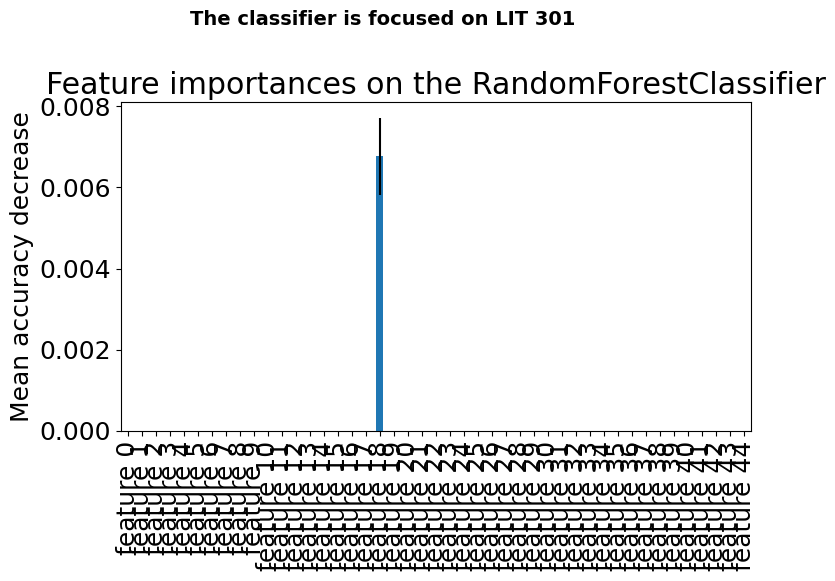

In [49]:
get_feature_importance(rf_clf)

LIT 301 seems to be the only important value to monitor here for the classifier to achieve perfect accuracy.
Let's compare with the DecisionTreeClassifier to check if both models found the same feature importance.

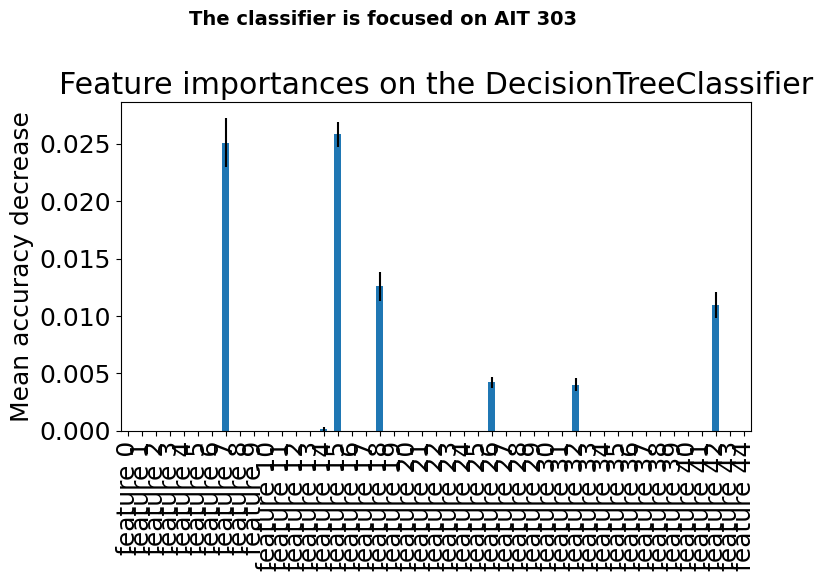

In [50]:
get_feature_importance(dtc_clf)

Finally, let's compare with the XGBoostClassifier.

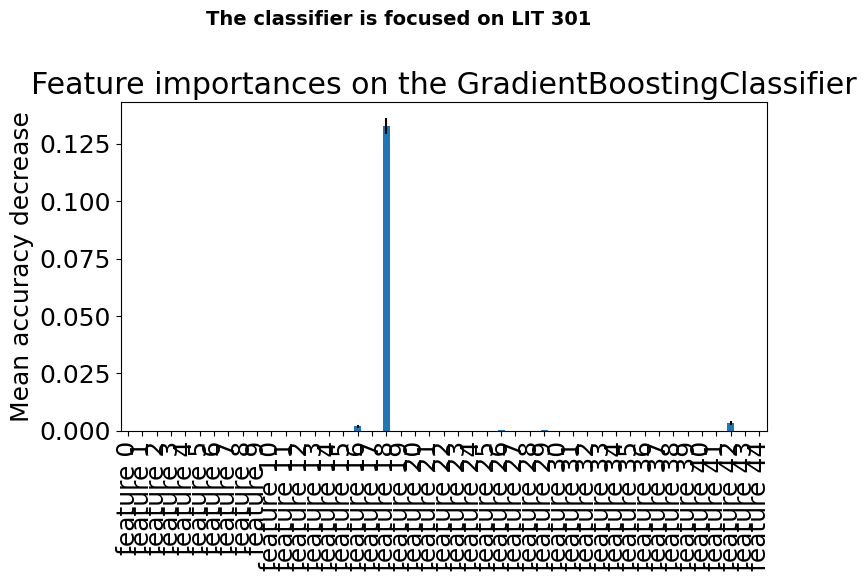

In [52]:
get_feature_importance(gb_clf)

Interestingly, XGBoost is focused elsewhere but gets the same metrics as the other two.

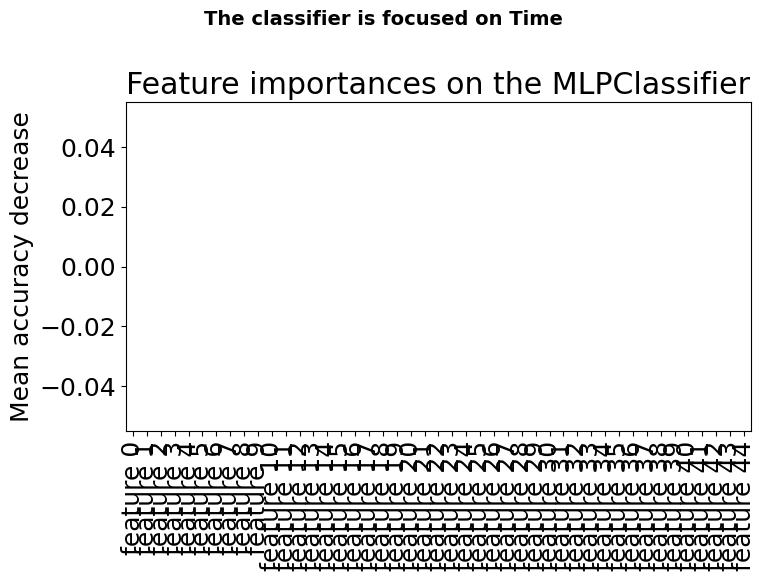

In [53]:
get_feature_importance(mlp_clf)